In [100]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Lasso
from sklearn import metrics
%matplotlib inline

In [127]:
dataset = pd.read_csv('proje1.csv',encoding='latin5',sep=";")

def intdegeremlak(x):
    if x == 'Daire':return 1
    else:return 0
def intdegeray(x):
    if x == 'Haziran':return 1
elif x == 'Mayıs': return 2
    else :return 0
def mahalleint(x):
    if x == 'Esentepe':return 1
    elif x == 'Yakacık':return 3
    elif x == 'Soğanlık':return 2
    elif x == 'Rahmanlar':return 5
    elif x == 'Uğurmumcu':return 7
    elif x == 'Topselvi':return 8
    elif x == 'Dragos':return 4
    else :return 0
dataset['Emlak Tipi']=dataset['Emlak Tipi'].apply(intdegeremlak)
dataset['Ay']=dataset['Ay'].apply(intdegeray)
dataset['Mahalle']=dataset['Mahalle'].apply(mahalleint)

#dataset[150:200]

SyntaxError: invalid syntax (<ipython-input-127-b5c2b00693ac>, line 8)

In [102]:
X =dataset.drop(['Fiyat'], axis=1)
y = dataset['Fiyat'].values.reshape(-1,1)

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=1)

In [104]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
print ("iNTERCEPT : ",linreg.intercept_)
print ("CO-EFFICIENT : ",linreg.coef_)

iNTERCEPT :  [220556.05795133]
CO-EFFICIENT :  [[     0.           3269.32545291 -42741.62337547   -778.4955773
   12739.86250868   3852.46086261]]


In [105]:
y_pred = linreg.predict(X_test)
 
print('Test',y_test)
print('Prediction',y_pred)

Test [[480000]
 [320000]
 [480000]
 ...
 [600000]
 [600000]
 [379000]]
Prediction [[418793.26705555]
 [433582.90316549]
 [399112.03583455]
 ...
 [583816.53085549]
 [576111.60913027]
 [432065.92903477]]


In [106]:
# calculate R^2 value, MAE, MSE, RMSE

from sklearn.metrics import r2_score
from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.11669295083010167


mean_absolute_error : 131254.3998466105


mean_squared_error :  37659163884.462616


root_mean_squared_error :  194059.69154995226


In [107]:
# alpha=0 is equivalent to linear regression
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print('Test',y_test)
print('Prediction',y_pred)

Test [[480000]
 [320000]
 [480000]
 ...
 [600000]
 [600000]
 [379000]]
Prediction [[418793.26705555]
 [433582.90316549]
 [399112.03583455]
 ...
 [583816.53085549]
 [576111.60913027]
 [432065.92903477]]


In [108]:
# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.11669295083010156


mean_absolute_error : 131254.3998466105


mean_squared_error :  37659163884.462616


root_mean_squared_error :  194059.69154995226


In [109]:
# try alpha=0.1
ridgereg = Ridge(alpha=0.1, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print('Test',y_test)
print('Prediction',y_pred)

Test [[480000]
 [320000]
 [480000]
 ...
 [600000]
 [600000]
 [379000]]
Prediction [[438904.30559441]
 [449391.88155938]
 [406159.05405813]
 ...
 [560769.83529972]
 [553806.52684223]
 [448227.0141564 ]]


In [110]:

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.1301597813245231


mean_absolute_error : 131676.32919833076


mean_squared_error :  37085015204.14777


root_mean_squared_error :  192574.700322103


In [111]:
# examing the coefficients
print(ridgereg.coef_)

[[     0.           2406.4201031  -21485.80953204   -772.26227525
   19380.68423638   3481.65422874]]


In [112]:
# create an array of alpha values
alpha_range = 10.**np.arange(-2, 3)
alpha_range
array=[]
 
from sklearn.linear_model import RidgeCV
ridgeregcv = RidgeCV(alphas=alpha_range, normalize=True, scoring='neg_mean_squared_error')
ridgeregcv.fit(X_train, y_train)
ridgeregcv.alpha_

0.01

In [113]:
# predict method uses the best alpha value
y_pred = ridgeregcv.predict(X_test)
print('Test',y_test)
print('Prediction',y_pred)

Test [[480000]
 [320000]
 [480000]
 ...
 [600000]
 [600000]
 [379000]]
Prediction [[421732.94560849]
 [435885.89858262]
 [400060.3482623 ]
 ...
 [580652.16358253]
 [573034.44068088]
 [434448.35825444]]


In [114]:

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.11993394008785196


mean_absolute_error : 131156.44703364


mean_squared_error :  37520986626.93919


root_mean_squared_error :  193703.34696886162


In [115]:
# try alpha=0.001 and examine coefficients
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.001, normalize=True)
lassoreg.fit(X_train, y_train)
print(lassoreg.coef_)

[     0.           3269.31841627 -42741.42188145   -778.43327873
  12738.78921924   3852.42899794]


In [116]:
# try alpha=0.01 and examine coefficients
lassoreg = Lasso(alpha=0.01, normalize=True)
lassoreg.fit(X_train, y_train)
print(lassoreg.coef_)

[     0.           3269.25516379 -42739.61012796   -777.87246084
  12729.12719815   3852.1422064 ]


In [117]:
# calculate RMSE (for alpha=0.01)
y_pred = lassoreg.predict(X_test)
print('Test',y_test)
print('Prediction',y_pred)

Test [[480000]
 [320000]
 [480000]
 ...
 [600000]
 [600000]
 [379000]]
Prediction [418795.78124484 433586.31214211 399111.10010266 ... 583814.28435592
 576109.99994312 432067.78731822]


In [118]:
# calculate MAE, MSE, RMSE
# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.11669483659020774


mean_absolute_error : 131254.25043729795


mean_squared_error :  37659083486.43008


root_mean_squared_error :  194059.48440215457


In [119]:
import matplotlib.pyplot as plt 


In [120]:
def scatter_plot(feature,target):
    plt.figure(figsize=(16,8))
    plt.scatter(dataset[feature],
               dataset[target],
               c='black')
    plt.show

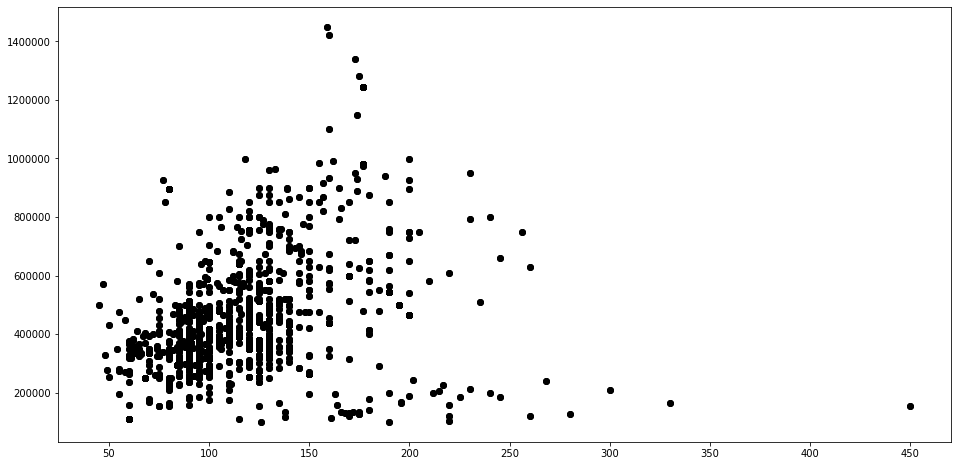

In [121]:
scatter_plot('MetreKare','Fiyat')

In [122]:
X = dataset['MetreKare'].values
Y = dataset['Fiyat'].values

In [123]:
mean_x = np.mean(X)
mean_y = np.mean(Y)


In [124]:
#Total Number of values
m = len(X)

#Using the formula to calculate b1 and b2
numer=0
denom=0
for i in range(m):
    numer += (X[i]- mean_x) * (Y[i]- mean_y)
    denom += (X[i]- mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

#Print coefficent
print(b1,b0)

1970.4185692672775 227398.00183244114


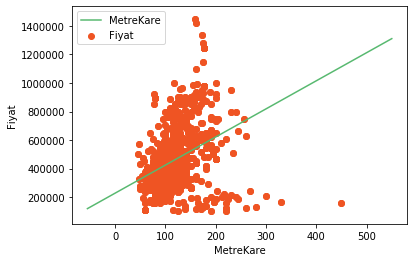

In [125]:
#Plotting values and Regression Line
max_x = np.max(X) + 100
min_x = np.min(X) - 100

#Calculating line values x and y
x = np.linspace(min_x,max_x,1000)
y = b0+b1*x

#Plotting Line
plt.plot(x,y, color='#58b970',label='MetreKare')
#Plotting Scatter Points
plt.scatter(X,Y, c='#ef5423', label='Fiyat')

plt.xlabel('MetreKare')
plt.ylabel('Fiyat')
plt.legend()
plt.show()